In [1]:
#https://www.kaggle.com/c/titanic/data
##Data Description:
""""VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations."""

'"VARIABLE DESCRIPTIONS:\nsurvival        Survival\n                (0 = No; 1 = Yes)\npclass          Passenger Class\n                (1 = 1st; 2 = 2nd; 3 = 3rd)\nname            Name\nsex             Sex\nage             Age\nsibsp           Number of Siblings/Spouses Aboard\nparch           Number of Parents/Children Aboard\nticket          Ticket Number\nfare            Passenger Fare\ncabin           Cabin\nembarked        Port of Embarkation\n                (C = Cherbourg; Q = Queenstown; S = Southampton)\n\nSPECIAL NOTES:\nPclass is a proxy for socio-economic status (SES)\n 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower\n\nAge is in Years; Fractional if Age less than One (1)\n If the Age is Estimated, it is in the form xx.5\n\nWith respect to the family relation variables (i.e. sibsp and parch)\nsome relations were ignored.  The following are the definitions used\nfor sibsp and parch.\n\nSibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic\nSpouse:   Husba

In [40]:
#insert packages and modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#read titanic_data.csv and put it in variable "data"
#for pc: C:\Users\sbassam\Desktop\Titanic\titanic_data.csv
#for mac: /Users/Nasha/Desktop
filename = r'/Users/Nasha/Desktop/Titanic/titanic_data.csv'
data = pd.read_csv(filename)

#Let's look at the data first
print data.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print data.groupby('Sex').PassengerId.nunique()

Sex
female    314
male      577
Name: PassengerId, dtype: int64


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
data.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

##Questions:

1) Is there a correlation between the following parameters and survival?
    - Age
    - Pclass
    - Fare
    - SibSp
    - Parch
2) How significant is the correlation

WRANGLE!

EXPLORE!

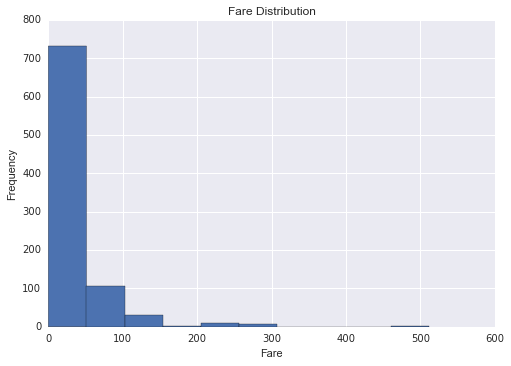

In [44]:
#%matplotlib inline
plt.hist(data['Fare'])
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Fare Distribution")

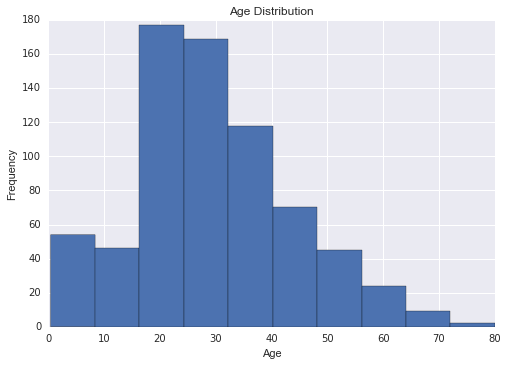

In [45]:
plt.hist(data['Age'].dropna())
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")

In [48]:
#Pearson's R:
# R = average of x(standardized) * y(standardized)
#standardize
def correlation(x, y):
    
    x = (x - x.mean())/x.std(ddof = 0)
    y = (y - y.mean())/y.std(ddof = 0)
    z = x*y
    correlation = z.mean()
    
    return correlation

In [51]:
Age_r    = correlation(data['Age'], data['Survived'])
Pclass_r = correlation(data['Pclass'], data['Survived'])
Fare_r   = correlation(data['Fare'], data['Survived'])
SibSp_r  = correlation(data['SibSp'], data['Survived'])
Parch_r  = correlation(data['Parch'], data['Survived'])

In [53]:
print Age_r, Pclass_r, Fare_r, SibSp_r, Parch_r

-0.0779826784139 -0.338481035961 0.257306522385 -0.0353224988857 0.0816294070835


In [ ]:
#Seems like Pclass_r is somewhat more strongly correlated; however, none of the parameters are near to max value of r,
#which is 1.

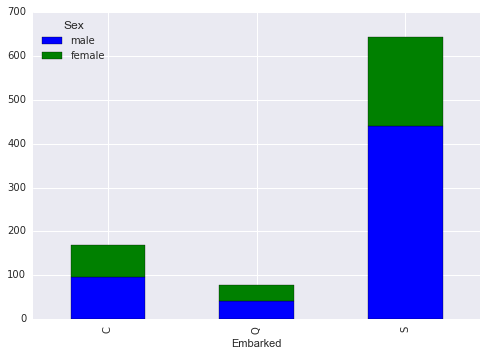

In [55]:
df2 = data.groupby(['Sex', 'Embarked'])['PassengerId'].count().unstack('Sex').fillna(0)
df2[['male','female']].plot(kind='bar', stacked=True)
plt.show()

In [77]:
#a = data['Survived'].dropna()
#b = [data['Age'], data['Survived']].dropna().groupby('Survived')
#plt.hist(a,b, histtype='step', stacked=True, fill=True)
grouped = data.groupby(['Survived'])

COMMUNICATING FINDINGS